Dipole amplitude from LCPT calculation

A. Dumitru, H. Mäntysaari, R. Paatelainen, arXiv:2103.11682,  Phys.Lett.B 820 (2021) 136560 

### Settings

In [5]:
import matplotlib.pylab as plt
plt.style.use('classic')
import scipy.interpolate
import scipy.integrate
import numpy as np

%matplotlib inline


FMGEV=5.068
lw=1.5
legfont=15
plt.style.use('default')
plt.rc("xtick", labelsize=legfont)
plt.rc("ytick", labelsize=legfont)
plt.rcParams.update({'font.size': legfont})
plt.rc('axes.formatter', useoffset=False)


# Load data and construct interpolators

In [11]:
def InitializeInterpolator(datafile, interpolation_type="nearest"):
    '''Possible interpolator types are nearest, linear and CloughTocher'''
    '''Returns an interpolator with arguments b,r in 1/GeV'''
    '''Note: interpolator is 0 outside the provided grid'''
    
    dat = np.loadtxt(datafile)
    b=dat[:,0]
    r=dat[:,1]
    d=dat[:,2]
    
    if interpolation_type=="nearest":
        return scipy.interpolate.NearestNDInterpolator((b,r),d, fill_value=0)
    elif interpolation_type=="linear":
        return scipy.interpolate.LinearNDInterpolator((b,r),d, fill_value=0)
    elif interpolation_type=="CloughTocher": #Piecewise cubic, C1 smooth, curvature-minimizing interpolant in 2D.
        return scipy.interpolate.CloughTocher2DInterpolator((b,r),d, fill_value=0)
    else:
        print("Interpolator " + interpolation_type + " is not supported!")

In [7]:
def B_integrated_dipole(interpolator, r):
    '''Calculates \int d^2b N(r,b)'''
    '''r is in 1/GeV'''
    
    integrand = lambda b:  2.0*np.pi*b*interpolator(b,r)
    integ = scipy.integrate.quad (integrand, 0, 99)
    return integ[0]

# Plot dipole amplitudes and $v_2$

Dipole at b=0.1fm, r=0.5fm:  0.19792133228650907


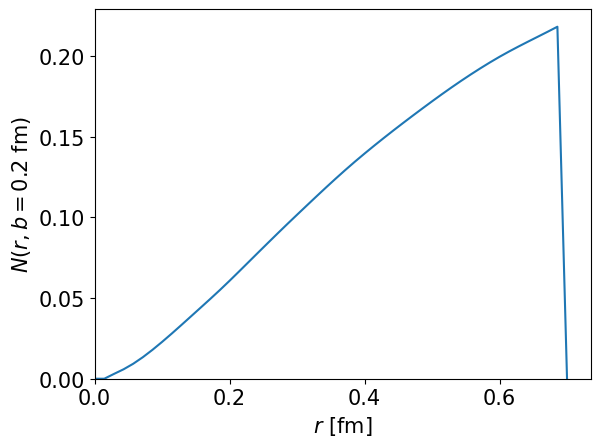

In [38]:
def ExampleInterpolators():
    interp = InitializeInterpolator("./data/nlo_dipole_x_0.01_as_0.2_m_0.2", interpolation_type="CloughTocher")
    print("Dipole at b=0.1fm, r=0.5fm: ", interp(0.1*FMGEV, 0.5*FMGEV))
    
    #print("b integrated dipole at r=0.2fm: " , B_integrated_dipole(interp, 0.2*FMGEV))
    
    rvals = np.linspace(0,0.7*FMGEV, num=50)
    b=0.2*FMGEV

    plt.plot(rvals/FMGEV, interp(b, rvals))
    
    plt.xlabel(r"$r\ [\mathrm{fm}]$")
    plt.ylabel(r"$N(r, b=" + str(round(b/FMGEV, 2)) + r"\ \mathrm{fm})$")
    
    plt.xlim(left=0)
    plt.ylim(bottom=0)

ExampleInterpolators()

v2 at b=0.1fm, r=0.5fm:  -0.004868207204872566


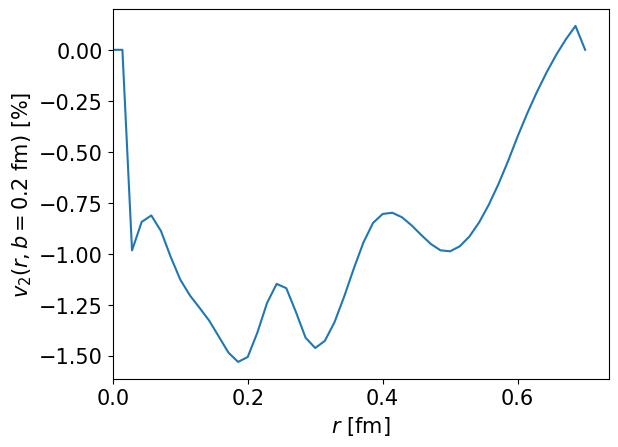

In [37]:
def V2Rdep():
    interp = InitializeInterpolator("./data/nlo_v2_x_0.01_as_0.2_m_0.2", interpolation_type="CloughTocher")
    print("v2 at b=0.1fm, r=0.5fm: ", interp(0.1*FMGEV, 0.5*FMGEV))
    
    #print("b integrated dipole at r=0.2fm: " , B_integrated_dipole(interp, 0.2*FMGEV))
    
    rvals = np.linspace(0,0.7*FMGEV, num=50)
    b=0.2*FMGEV

    plt.plot(rvals/FMGEV, 100*interp(b, rvals))
    
    plt.xlabel(r"$r\ [\mathrm{fm}]$")
    plt.ylabel(r"$v_2(r, b=" + str(round(b/FMGEV, 2)) + r"\ \mathrm{fm}) \ [\%]$")
    
    plt.xlim(left=0)

V2Rdep()